# Data Science Packages - Pandas
In this notebook, we will illustrate the core functionality of the Pandas package in Python. 

In [1]:
import pandas as pd
import numpy as np # Needed for some functions that will be used later

The data that will be used is a cleaned version of the *movies* dataset that is publicly available on Kaggle. The cleaned version has been made available on the course's AWS S3 bucket: 

In [2]:
movies = pd.read_parquet('https://kuleuven-mda.s3.eu-central-1.amazonaws.com/movies.parquet.gzip')
movies

,id,original_title,release_date,original_language,popularity,revenue,vote_average,vote_count
0,862,Toy Story,1995-10-30,en,21.946943,373554033.0,7.7,5415.0
1,8844,Jumanji,1995-12-15,en,17.015539,262797249.0,6.9,2413.0
2,15602,Grumpier Old Men,1995-12-22,en,11.712900,0.0,6.5,92.0
3,31357,Waiting to Exhale,1995-12-22,en,3.859495,81452156.0,6.1,34.0
4,11862,Father of the Bride Part II,1995-02-10,en,8.387519,76578911.0,5.7,173.0
...,...,...,...,...,...,...,...,...
45449,439050,رگ خواب,None,fa,0.072051,0.0,4.0,1.0
45450,111109,Siglo ng Pagluluwal,2011-11-17,tl,0.178241,0.0,9.0,3.0
45451,67758,Betrayal,2003-08-01,en,0.903007,0.0,3.8,6.0
45452,227506,Satana likuyushchiy,1917-10-21,en,0.003503,0.0,0.0,0.0


#### Basic Data Exploration
First, we start with exploring the basic properties of the dataframe. In this step, we just try to understand what the data looks like and verify whether or not the data types are correct. Pandas has a lot of useful functions for this.

Identifying the shape of our data, i.e., the number of rows and columns can be done through the shape property:

In [3]:
print("Number of observations: {}".format(movies.shape[0]))
print("Number of columns:      {}".format(movies.shape[1]))

Number of observations: 45454
Number of columns:      8


Next, we check the names and data types of these columns:

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45454 entries, 0 to 45453
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45454 non-null  object 
 1   original_title     45454 non-null  object 
 2   release_date       45368 non-null  object 
 3   original_language  45443 non-null  object 
 4   popularity         45451 non-null  float64
 5   revenue            45451 non-null  float64
 6   vote_average       45451 non-null  float64
 7   vote_count         45451 non-null  float64
dtypes: float64(4), object(4)
memory usage: 2.8+ MB


Note that the release data is **not** stored as a datetime object even though it should be a date! This can be solved using the pandas *to_datetime* function. The ID is also not stored as an integer, and the original_language is stored as a string even thought it is more of a categorical variable. All of these things can be changed using built-in pandas methods:

In [5]:
movies.release_date = pd.to_datetime(movies.release_date)
movies.id = pd.to_numeric(movies.id)
movies.original_language = pd.Categorical(movies.original_language) # Unfortunately, the inconsistent syntax is
# something you will need to accept

Next, we check some specific observations. Three methods are useful: (1) head(), (2) tail(), and (3) sample.

In [6]:
movies.head()
#movies.tail()
#movies.sample(5, random_state=123)

,id,original_title,release_date,original_language,popularity,revenue,vote_average,vote_count
0,862,Toy Story,1995-10-30,en,21.946943,373554033.0,7.7,5415.0
1,8844,Jumanji,1995-12-15,en,17.015539,262797249.0,6.9,2413.0
2,15602,Grumpier Old Men,1995-12-22,en,11.712900,0.0,6.5,92.0
3,31357,Waiting to Exhale,1995-12-22,en,3.859495,81452156.0,6.1,34.0
4,11862,Father of the Bride Part II,1995-02-10,en,8.387519,76578911.0,5.7,173.0


#### Data Subsetting and Filtering
Let's say we only want to get information on the original title of the movies and store that information in a new variable named *information*. In pandas, there are four different ways of doing this:

In [7]:
information = movies['original_title'] # Simple and allows for column names with spaces and other special characters
information = movies.original_title # Most intuitively written
information = movies.loc[:, 'original_title'] # Allows selecting specific rows and columns at same time
information = movies.iloc[:, 1] # Allows to filter based on index
information.head() # This head() method is not the same as the one used earlier!!

0                      Toy Story
1                        Jumanji
2               Grumpier Old Men
3              Waiting to Exhale
4    Father of the Bride Part II
Name: original_title, dtype: object

Filtering specific rows is done through a *mask* which is a collection of True and False values indicating which rows should be included:

In [8]:
mask = movies.original_language == 'nl'
movies.loc[mask, :] # Only filter rows -> view of DataFrame
movies[mask] # also filters rows -> creates new dataframe object
movies.loc[mask, ["original_title", "popularity", "original_language"]].head() # Rows and columns

,original_title,popularity,original_language
81,Antonia,2.030174,nl
687,Daens,0.755047,nl
862,06,0.062128,nl
1752,Karakter,1.221677,nl
2710,Rosie,0.100686,nl


In [9]:
# Note: this is NOT the same as the following even though they give the same results
movies[mask][["original_title", "popularity", "original_language"]].head()

,original_title,popularity,original_language
81,Antonia,2.030174,nl
687,Daens,0.755047,nl
862,06,0.062128,nl
1752,Karakter,1.221677,nl
2710,Rosie,0.100686,nl


Proof that these are not the same:

In [10]:
mask = movies.original_title == 'Toy Story'
movies.loc[mask, "original_title"] = "Toy Story I"
movies.head(2)

,id,original_title,release_date,original_language,popularity,revenue,vote_average,vote_count
0,862,Toy Story I,1995-10-30,en,21.946943,373554033.0,7.7,5415.0
1,8844,Jumanji,1995-12-15,en,17.015539,262797249.0,6.9,2413.0


In [11]:
mask = movies.original_title == 'Jumanji'
movies[mask]["original_title"] = "Jumanji I"
movies.head(2)
# Notice the warning!!

/var/folders/zz/zvsv6f4s4wn29k9lt76bdlsr0000gn/T/ipykernel_97827/2271490628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[mask]["original_title"] = "Jumanji I"


,id,original_title,release_date,original_language,popularity,revenue,vote_average,vote_count
0,862,Toy Story I,1995-10-30,en,21.946943,373554033.0,7.7,5415.0
1,8844,Jumanji,1995-12-15,en,17.015539,262797249.0,6.9,2413.0


In practice: do not chain filtering or subsetting operations
#### Modifying and adding data
The current grading system is on a scale of them. Instead, we would like to transform the votes to represent 1 to 5 stars. This requires us to do two things: (1) divide the vote average by two, and (2) floor the value.

In [12]:
movies.loc[:, 'stars'] = np.floor(movies.vote_average / 2)
movies.head()

,id,original_title,release_date,original_language,popularity,revenue,vote_average,vote_count,stars
0,862,Toy Story I,1995-10-30,en,21.946943,373554033.0,7.7,5415.0,3.0
1,8844,Jumanji,1995-12-15,en,17.015539,262797249.0,6.9,2413.0,3.0
2,15602,Grumpier Old Men,1995-12-22,en,11.712900,0.0,6.5,92.0,3.0
3,31357,Waiting to Exhale,1995-12-22,en,3.859495,81452156.0,6.1,34.0,3.0
4,11862,Father of the Bride Part II,1995-02-10,en,8.387519,76578911.0,5.7,173.0,2.0


Now we want to transform this variable into real stars:

In [13]:
movies.loc[:, 'stars'] = movies.stars.apply(lambda x: '⭐'*int(x) if not pd.isna(x) else None) 
movies.head()

,id,original_title,release_date,original_language,popularity,revenue,vote_average,vote_count,stars
0,862,Toy Story I,1995-10-30,en,21.946943,373554033.0,7.7,5415.0,⭐⭐⭐
1,8844,Jumanji,1995-12-15,en,17.015539,262797249.0,6.9,2413.0,⭐⭐⭐
2,15602,Grumpier Old Men,1995-12-22,en,11.712900,0.0,6.5,92.0,⭐⭐⭐
3,31357,Waiting to Exhale,1995-12-22,en,3.859495,81452156.0,6.1,34.0,⭐⭐⭐
4,11862,Father of the Bride Part II,1995-02-10,en,8.387519,76578911.0,5.7,173.0,⭐⭐


#### Imputing data
Next, we would like to impute the revenue of movies. In a first step, we do this simply by using the median value:

In [14]:
print(sum(movies.revenue.isnull()))

3


In [15]:
movies.loc[:, "revenue_imputed"] = movies.revenue.fillna(movies.revenue.median())
print(sum(movies.revenue_imputed.isnull()))

0


More advanced imputation methods can be implemented using Sklearn!

#### Computing statistics
A wide variety of statistics can be computed by default:

In [16]:
movies_numeric = movies.select_dtypes(include='number')
movies_numeric.head()

,id,popularity,revenue,vote_average,vote_count,revenue_imputed
0,862,21.946943,373554033.0,7.7,5415.0,373554033.0
1,8844,17.015539,262797249.0,6.9,2413.0,262797249.0
2,15602,11.712900,0.0,6.5,92.0,0.0
3,31357,3.859495,81452156.0,6.1,34.0,81452156.0
4,11862,8.387519,76578911.0,5.7,173.0,76578911.0


In [17]:
movies_numeric.describe()

,id,popularity,revenue,vote_average,vote_count,revenue_imputed
count,45454.000000,45451.000000,4.545100e+04,45451.000000,45451.000000,4.545400e+04
mean,108348.389075,2.921765,1.121157e+07,5.618543,109.917538,1.121083e+07
std,112445.975875,6.005910,6.433842e+07,1.924085,491.356914,6.433636e+07
min,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,26447.500000,0.385945,0.000000e+00,5.000000,3.000000,0.000000e+00
50%,60004.000000,1.127613,0.000000e+00,6.000000,10.000000,0.000000e+00
75%,157304.000000,3.679334,0.000000e+00,6.800000,34.000000,0.000000e+00
max,469172.000000,547.488298,2.787965e+09,10.000000,14075.000000,2.787965e+09


In [18]:
movies_numeric.mean()

id                 1.083484e+05
popularity         2.921765e+00
revenue            1.121157e+07
vote_average       5.618543e+00
vote_count         1.099175e+02
revenue_imputed    1.121083e+07
dtype: float64

In [19]:
movies_numeric.corr()

,id,popularity,revenue,vote_average,vote_count,revenue_imputed
id,1.000000,-0.083499,-0.071262,-0.167600,-0.064897,-0.071265
popularity,-0.083499,1.000000,0.506180,0.154378,0.559966,0.506180
revenue,-0.071262,0.506180,1.000000,0.083852,0.812021,1.000000
vote_average,-0.167600,0.154378,0.083852,1.000000,0.123590,0.083852
vote_count,-0.064897,0.559966,0.812021,0.123590,1.000000,0.812021
revenue_imputed,-0.071265,0.506180,1.000000,0.083852,0.812021,1.000000


In [20]:
movies.original_title.mode()

0    Alice in Wonderland
1                 Hamlet
Name: original_title, dtype: object

#### Time Series analysis
Pandas was initially developed by Wes McKinney during his time at AQR Capital Management (a big hedge fund based in the US). Since time series analysis is a critical task when working with financial data, pandas was developed from the ground up to be a powerful tool to analyse time series data. The key requirement: make sure that your index is a datetime object.

In [21]:
movies = movies.replace(0.0, pd.NA)
movies.dropna(subset=['release_date', 'vote_average'], inplace=True)
movies.set_index('release_date', inplace=True, drop=True)
movies.sort_index(inplace=True)
movies.head()

,id,original_title,original_language,popularity,revenue,vote_average,vote_count,stars,revenue_imputed
release_date,,,,,,,,,
1874-12-09,315946,Passage de Venus,xx,0.480371,<NA>,6.0,19.0,⭐⭐⭐,<NA>
1878-06-14,194079,Sallie Gardner at a Gallop,en,0.327841,<NA>,6.2,25.0,⭐⭐⭐,<NA>
1883-11-19,426903,Buffalo Running,en,0.229221,<NA>,5.4,7.0,⭐⭐,<NA>
1887-08-18,159897,Man Walking Around a Corner,xx,1.184891,<NA>,4.1,17.0,⭐⭐,<NA>
1888-01-01,96882,Accordion Player,xx,0.212768,<NA>,4.4,18.0,⭐⭐,<NA>


It is very easy to compute rolling metrics like for example the rolling average:

In [22]:
movies.loc[:, "rolling_average_vote"] = movies.vote_average.rolling(500).mean()
movies.sample(5, random_state=12345)

,id,original_title,original_language,popularity,revenue,vote_average,vote_count,stars,revenue_imputed,rolling_average_vote
release_date,,,,,,,,,,
2006-01-01,60002,Room 314,en,0.172008,<NA>,4.0,1.0,⭐⭐,<NA>,5.9732
1957-11-10,39557,Decision at Sundown,en,1.805429,<NA>,7.0,11.0,⭐⭐⭐,<NA>,6.1730
2004-02-27,13572,Twisted,en,5.376246,25195000.0,5.3,127.0,⭐⭐,25195000.0,5.9916
2009-06-26,22843,ヱヴァンゲリヲン新劇場版：破,ja,6.518028,41162041.0,7.7,129.0,⭐⭐⭐,41162041.0,5.8174
2011-10-26,86718,7Aum Arivu,ta,2.252517,98900000.0,6.6,10.0,⭐⭐⭐,98900000.0,5.9354


Which can then be plotted:

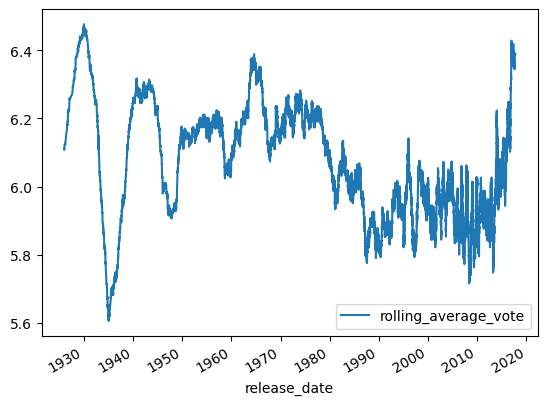

In [23]:
movies[['rolling_average_vote']].plot();